In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sensors import *
from functools import partial

# Case 1

Имеется 5 датчиков, 1 источник (дисперсия сигнала 0.7), и шум на каждом датчике имеет дисперсию 4.1.

In [2]:
Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 100
theta1_rad = [0.5] # Направление прибытия (DOA) в радианах
theta1_deg = rad_to_deg(theta1_rad[0]) # Направление прибытия (DOA) в градусах
GS_1 = np.array([[0.7]]) # Ковариация сигнала
GN_1 = 4.1*np.eye(5, dtype=np.float64) # Ковариация шума
A1 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors1).reshape(-1,1) * np.sin(theta1_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s1 = CN(Num_emitters1, sample_size1, GS_1)
n1 = CN(Num_sensors1, sample_size1, GN_1)
X1 = (A1 @ s1.T + n1.T).T

In [3]:
EM_theta1_rad, neglhd_1, K1, mu1 = multi_start_EM(X1, GS_1, GN_1, 10, max_iter=50, eps=1e-6)

0-th start
Iteration=1, theta_new=[2.42169477], -likelihood = -107.36897
Iteration=2, theta_new=[2.4530893], -likelihood = -115.26381
Iteration=3, theta_new=[2.48099798], -likelihood = -122.48585
Iteration=4, theta_new=[2.50516591], -likelihood = -128.60984
Iteration=5, theta_new=[2.52577726], -likelihood = -133.48900
Iteration=6, theta_new=[2.54316664], -likelihood = -137.21207
Iteration=7, theta_new=[2.55769547], -likelihood = -139.96443
Iteration=8, theta_new=[2.56980956], -likelihood = -141.94953
Iteration=9, theta_new=[2.57991062], -likelihood = -143.36341
Iteration=10, theta_new=[2.58828777], -likelihood = -144.36281
Iteration=11, theta_new=[2.59523874], -likelihood = -145.06169
Iteration=12, theta_new=[2.60100453], -likelihood = -145.54901
Iteration=13, theta_new=[2.60583061], -likelihood = -145.88793
Iteration=14, theta_new=[2.6098386], -likelihood = -146.12524
Iteration=15, theta_new=[2.61315187], -likelihood = -146.28976
Iteration=16, theta_new=[2.61589517], -likelihood = -14

In [4]:
EM_theta1_deg = rad_to_deg(EM_theta1_rad)

In [5]:
print(f"Погрешность в смысле разности углов в градусах: {np.abs(EM_theta1_deg-theta1_deg)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(EM_theta1_rad)-np.sin(theta1_rad))}.")

Погрешность в смысле разности углов в градусах: [0.69846702].
Погрешность в смысле разности синусов углов [0.01066233].


# Case 2

Имеется 5 датчиков, 2 источника (дисперсии сигналов - 2 и 3), и шум на каждом датчике имеет дисперсию 7.1.

In [6]:
Num_sensors2 = 5
Num_emitters2 = 2
sample_size2 = 100
theta2_rad = np.array([0.34906585, 1.22173048]) # Направление прибытия (DOA) в радианах
theta2_deg = rad_to_deg(theta2_rad) # Направление прибытия (DOA) в градусах
GS_2 = np.array([[2,0],[0,3]]) # Ковариация сигнала
GN_2 = 7.1*np.eye(5, dtype=np.float64) # Ковариация шума
A2 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors2).reshape(-1,1) * np.sin(theta2_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s2 = CN(Num_emitters2, sample_size2, GS_2)
n2 = CN(Num_sensors2, sample_size2, GN_2)
X2 = (A2 @ s2.T + n2.T).T

In [7]:
EM_theta2_rad, neglhd_2, K2, mu2 = multi_start_EM(X2, GS_2, GN_2, 10, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[ 2.05374344 -0.99571689], -likelihood = -370.61411
Iteration=2, theta_new=[ 2.05783678 -1.00850052], -likelihood = -370.71105
Iteration=3, theta_new=[ 2.06271354 -1.02109543], -likelihood = -370.83012
Iteration=4, theta_new=[ 2.06811319 -1.03342543], -likelihood = -370.97454
Iteration=5, theta_new=[ 2.07386044 -1.04565592], -likelihood = -371.14146
Iteration=6, theta_new=[ 2.07984855 -1.0577897 ], -likelihood = -371.32620
Iteration=7, theta_new=[ 2.08602677 -1.06970804], -likelihood = -371.52534
Iteration=8, theta_new=[ 2.09227586 -1.08154327], -likelihood = -371.73791
Iteration=9, theta_new=[ 2.09850054 -1.09311473], -likelihood = -371.95713
Iteration=10, theta_new=[ 2.1047349  -1.10447185], -likelihood = -372.17907
Iteration=11, theta_new=[ 2.11091573 -1.11561188], -likelihood = -372.40456
Iteration=12, theta_new=[ 2.11700761 -1.12651582], -likelihood = -372.62980
Iteration=13, theta_new=[ 2.12298533 -1.13711044], -likelihood = -372.85259
Iteration=

In [8]:
EM_theta2_deg = rad_to_deg(EM_theta2_rad)

In [9]:
print(f"Погрешность в смысле разности углов в градусах: {np.abs(EM_theta2_deg-theta2_deg)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(EM_theta2_rad)-np.sin(theta2_rad))}.")

Погрешность в смысле разности углов в градусах: [109.99956347  51.46670251].
Погрешность в смысле разности синусов углов [1.34202014 0.6218369 ].


## Примерный вид функции, оптимизируемой на М-шаге (первая итерация):

In [10]:
W1, W2 = goal_function_EM(X1, GS_1, GN_2, 50)

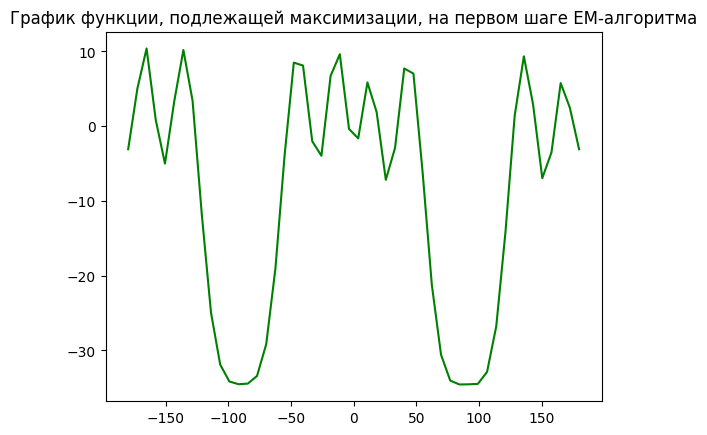

In [11]:
plt.title("График функции, подлежащей максимизации, на первом шаге ЕМ-алгоритма")
plt.plot(rad_to_deg(W1), W2.real, color='green')

Теперь проведем сравнение с **CAPON**:

In [12]:
R = space_covariance_matrix(X1)
angles = np.linspace(-1*np.pi, np.pi, 1000)
Powers = []
for angle in angles:
    a = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors1) * np.sin(angle))
    Powers.append(capon_func(a,R).real)

In [13]:
angles[np.argmax(Powers)]*180/np.pi

29.369369369369345

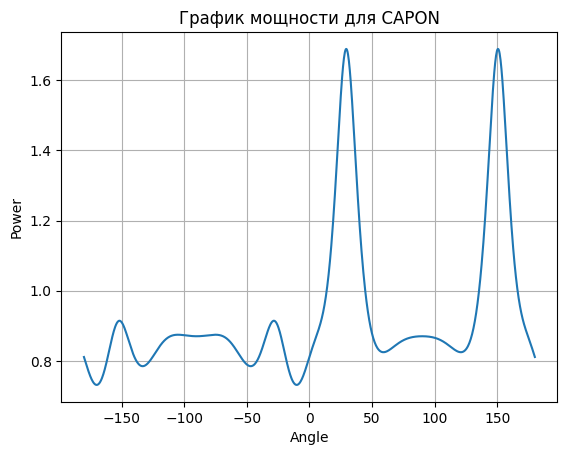

In [14]:
plt.title("График мощности для CAPON")
plt.plot(angles*180/np.pi, Powers) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

# Оценка **CAPON** в градусах для первого случая

In [15]:
capon_theta1_deg = rad_to_deg(angles[np.argmax(Powers)])

In [16]:
print(f"Оценка CAPON: {capon_theta1_deg}, \nОценка ЕМ-алгоритма: {EM_theta1_deg}, \nИстинное значение: {theta1_deg}")

Оценка CAPON: 29.369369369369345, 
Оценка ЕМ-алгоритма: [29.34635677], 
Истинное значение: 28.64788975654116


# Case 3

Имеется 7 датчиков, 3 источника (дисперсии сигналов - 0.1, 0.5 и 0.9), и шум на каждом датчике имеет дисперсию 1.1.

In [17]:
Num_sensors3 = 7
Num_emitters3 = 3
sample_size3 = 100
theta3_rad = [0.5, 1.2, 1.6] # Направление прибытия (DOA) в радианах
theta3_deg = rad_to_deg(theta3_rad[0]) # Направление прибытия (DOA) в градусах
GS_3 = np.diag([0.1, 0.5, 0.9]) # Ковариация сигнала
GN_3 = 1.1*np.eye(7, dtype=np.float64) # Ковариация шума
A3 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors3).reshape(-1,1) * np.sin(theta3_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s3 = CN(Num_emitters3, sample_size3, GS_3)
n3 = CN(Num_sensors3, sample_size3, GN_3)
X3 = (A3 @ s3.T + n3.T).T

In [18]:
EM_theta3_rad, neglhd_3, K3, mu3 = multi_start_EM(X3, GS_3, GN_3, 25, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[0.3323731  2.33373365 1.67576902], -likelihood = -1139.35579
Iteration=2, theta_new=[0.3475559  2.32813327 1.68952364], -likelihood = -1143.93243
Iteration=3, theta_new=[0.36276766 2.32292321 1.69884956], -likelihood = -1148.49598
Iteration=4, theta_new=[0.37747303 2.31804321 1.70518405], -likelihood = -1152.87639
Iteration=5, theta_new=[0.39124331 2.31334709 1.70946356], -likelihood = -1156.86679
Iteration=6, theta_new=[0.40381774 2.30887696 1.71213618], -likelihood = -1160.32542
Iteration=7, theta_new=[0.41507983 2.30449821 1.71355005], -likelihood = -1163.19766
Iteration=8, theta_new=[0.42506835 2.30013549 1.71404631], -likelihood = -1165.51491
Iteration=9, theta_new=[0.43381073 2.29581863 1.71367035], -likelihood = -1167.35862
Iteration=10, theta_new=[0.44144751 2.29150417 1.71244684], -likelihood = -1168.80553
Iteration=11, theta_new=[0.44802382 2.28723637 1.71081442], -likelihood = -1169.94549
Iteration=12, theta_new=[0.45373813 2.28296632 1.708

In [19]:
EM_theta3_rad

array([ 0.92876892,  0.50318034, -1.57077287])

# Case 4

Имеется 7 датчиков, 3 источника (дисперсии сигналов - 0.5, 0.5 и 0.5), и шум на каждом датчике имеет дисперсию 1.1.

In [20]:
Num_sensors4 = 7
Num_emitters4 = 3
sample_size4 = 100
theta4_rad = [0.5, 1.1, -0.3] # Направление прибытия (DOA) в радианах
theta4_deg = rad_to_deg(theta4_rad[0]) # Направление прибытия (DOA) в градусах
GS_4 = np.diag([0.5, 0.5, 0.5]) # Ковариация сигнала
GN_4 = 1.1*np.eye(7, dtype=np.float64) # Ковариация шума
A4 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors4).reshape(-1,1) * np.sin(theta4_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s4 = CN(Num_emitters4, sample_size4, GS_4)
n4 = CN(Num_sensors4, sample_size4, GN_4)
X4 = (A4 @ s4.T + n4.T).T

In [21]:
EM_theta4_rad, neglhd_4, K4, mu4 = multi_start_EM(X4, GS_4, GN_4, 30, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[ 2.49471716 -2.24335264  2.98237366], -likelihood = -472.82245
Iteration=2, theta_new=[ 2.52870202 -2.26036534  2.98636444], -likelihood = -535.94004
Iteration=3, theta_new=[ 2.55619218 -2.27872984  2.98932864], -likelihood = -595.71348
Iteration=4, theta_new=[ 2.57719781 -2.29719784  2.99153506], -likelihood = -640.69586
Iteration=5, theta_new=[ 2.59295243 -2.31442669  2.99325236], -likelihood = -670.54864
Iteration=6, theta_new=[ 2.60469477 -2.32960212  2.99453161], -likelihood = -689.24116
Iteration=7, theta_new=[ 2.61343548 -2.34247811  2.99541585], -likelihood = -700.64230
Iteration=8, theta_new=[ 2.61998961 -2.35318873  2.99600012], -likelihood = -707.53294
Iteration=9, theta_new=[ 2.62492224 -2.36188682  2.9963351 ], -likelihood = -711.71620
Iteration=10, theta_new=[ 2.62863781 -2.36901559  2.99654131], -likelihood = -714.25486
Iteration=11, theta_new=[ 2.63147655 -2.37473849  2.99660547], -likelihood = -715.81481
Iteration=12, theta_new=[ 2.63

In [22]:
EM_theta4_rad

array([-0.29208233,  0.51089478,  1.10972601])